# Yulu - Hypothesis Testing

## About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## How you can help here?
The company wants to know:
* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

## Dataset:
Dataset Link: yulu_data.csv

## Column Profiling:
* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
    * 1: Clear, Few clouds, partly cloudy, partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

## Concept Used:
* Bi-Variate Analysis
* 2-sample t-test: testing for difference across populations
* ANNOVA
* Chi-square

## How to begin:
* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
* Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
* Select an appropriate test to check whether:
    * Working Day has effect on number of electric cycles rented
    * No. of cycles rented similar or different in different seasons
    * No. of cycles rented similar or different in different weather
    * Weather is dependent on season (check between 2 predictor variable)
* Set up Null Hypothesis (H0)
* State the alternate hypothesis (H1)
* Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
    * Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
* Set a significance level (alpha)
* Calculate test Statistics.
* Decision to accept or reject null hypothesis.
* Inference from the analysis

## Evaluation Criteria (50 Points):
1. Define Problem Statement and perform Exploratory Data Analysis (10 points)
    * Definition of problem (as per given problem statement with additional views)
    * Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
    * Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
    * Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
    * Illustrate the insights based on EDA
        * Comments on range of attributes, outliers of various attributes
        * Comments on the distribution of the variables and relationship between them
        * Comments for each univariate and bivariate plots
2. Hypothesis Testing (30 Points):
    * 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)
    * ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)
    * Chi-square test to check if Weather is dependent on the season (10 points)
3. Notebook Quality (10 points):
    * Structure & Flow
    * Well commented code

## What good looks like (distribution of 10 points):
* Visual analysis (1)
* Hypothesis formulation (1)
* Select the appropriate test (1)
* Check test assumptions (2)
* Find the p-value(1)
* Conclusion based on the p-value (2)


In [1]:
# Download Data
!gdown 1p-CU5e_W2CD1qScMpbyByuFwpJLr4KVQ

Downloading...
From: https://drive.google.com/uc?id=1p-CU5e_W2CD1qScMpbyByuFwpJLr4KVQ
To: /content/yulu_data.csv
100% 648k/648k [00:00<00:00, 52.4MB/s]


## Step 1: Import Libraries and Load Data

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load Data
df = pd.read_csv('yulu_data.csv', parse_dates=['datetime'])

## Step 2: Exploratory Data Analysis (EDA)

Data Shape: (10886, 12)

Data Types:
 datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

Missing Values:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Summary Statistics:
                             datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%            

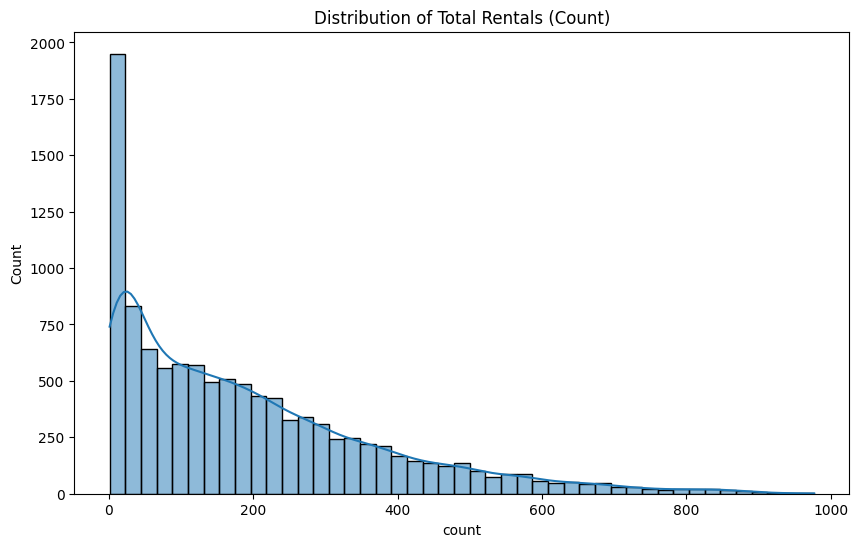

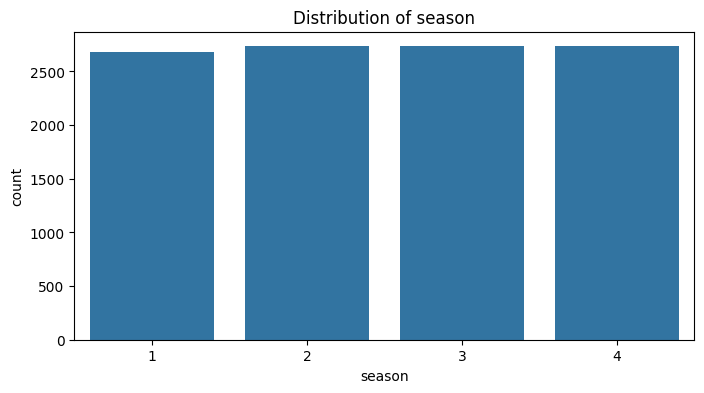

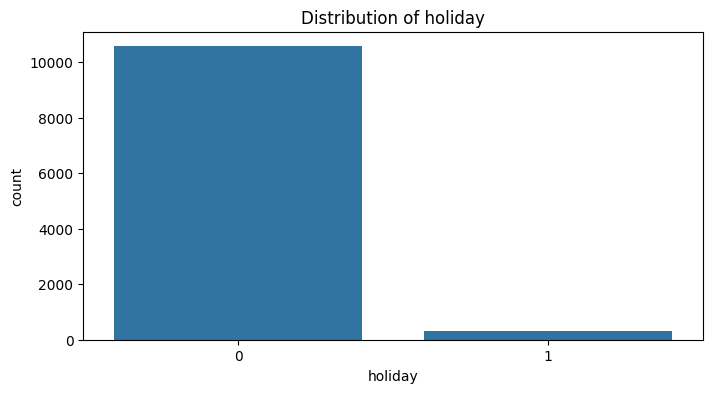

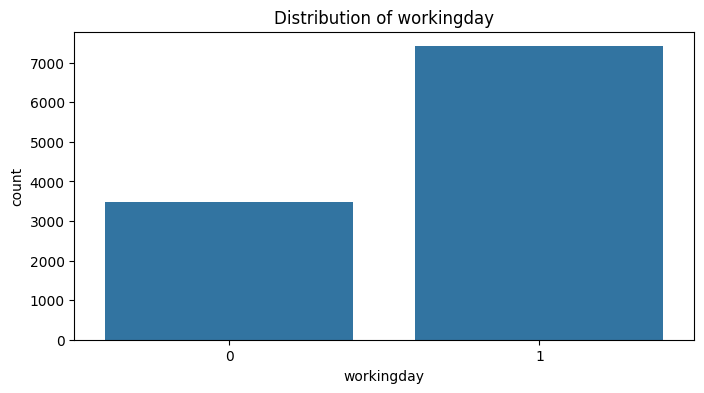

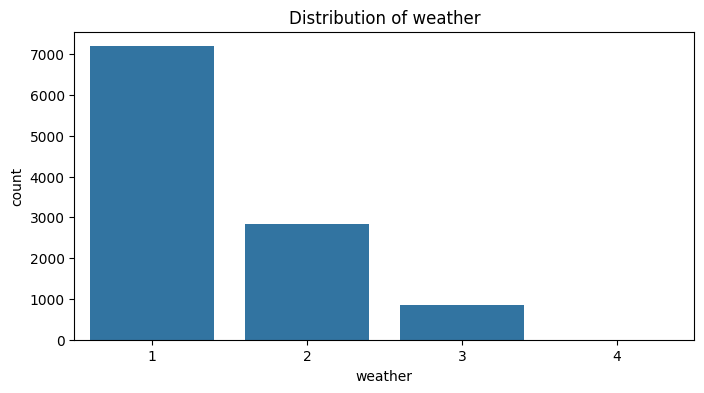

-----------------------------------------------------------------------
2. Bivariate Analysis
-----------------------------------------------------------------------


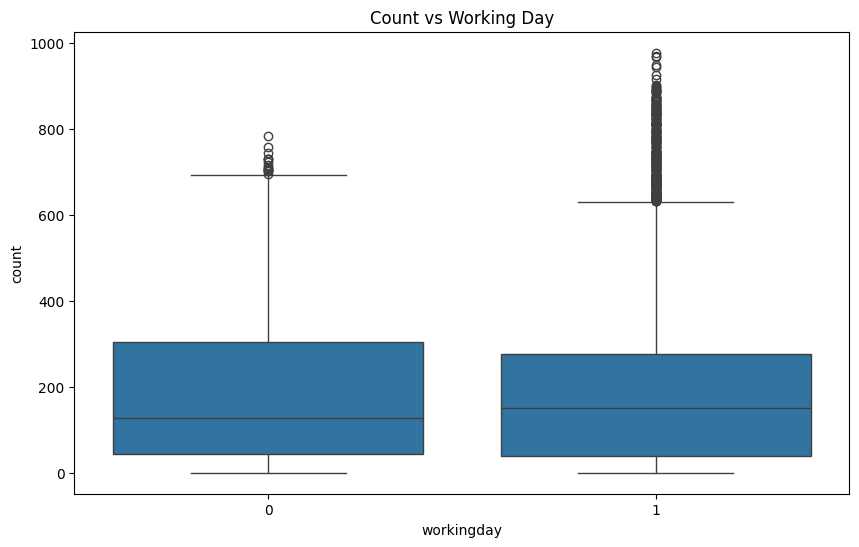

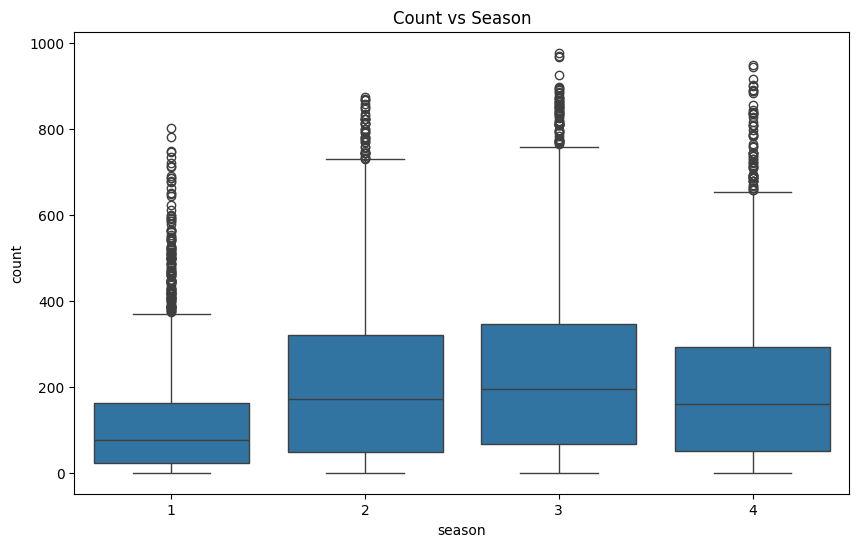

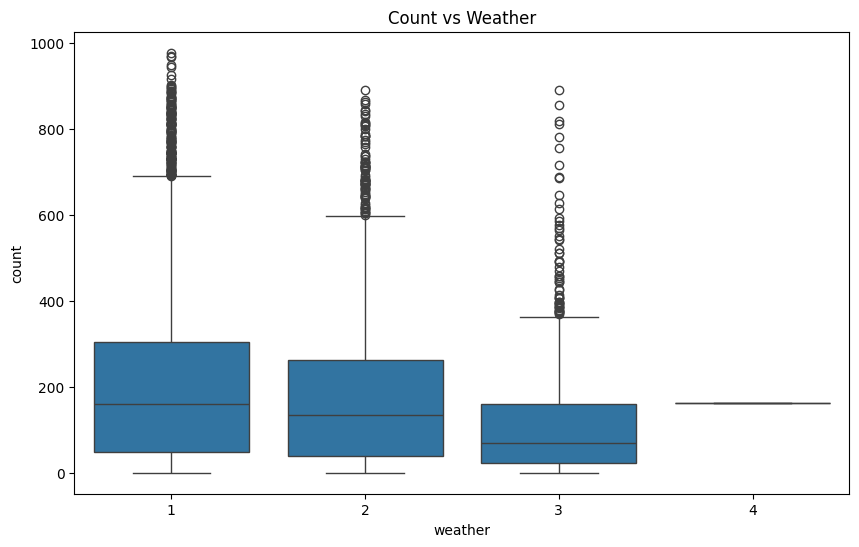

In [3]:
# Data Structure and Summary
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

# Convert Categorical Variables
categorical_cols = ['season', 'holiday', 'workingday', 'weather']
df[categorical_cols] = df[categorical_cols].astype('category')

print("-----------------------------------------------------------------------")
print("1. Univariate Analysis")
print("-----------------------------------------------------------------------")

# Distribution of 'count'
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], kde=True)
plt.title('Distribution of Total Rentals (Count)')
plt.show()

# Bar plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

print("-----------------------------------------------------------------------")
print("2. Bivariate Analysis")
print("-----------------------------------------------------------------------")

# Boxplots for count vs categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='workingday', y='count')
plt.title('Count vs Working Day')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='count')
plt.title('Count vs Season')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weather', y='count')
plt.title('Count vs Weather')
plt.show()

## Step 3: Hypothesis Testing

### 1. 2-Sample T-Test: Working Day vs Count
Hypotheses:

H0: Mean count on working days = Mean count on non-working days.
H1: Means are different.



In [5]:
# Split data
working_day = df[df['workingday'] == 1]['count']
non_working_day = df[df['workingday'] == 0]['count']

# Check variance equality
levene_stat, levene_p = stats.levene(working_day, non_working_day)
print(f"Levene's Test p-value: {levene_p}")

# Perform t-test
t_stat, p_value = stats.ttest_ind(working_day, non_working_day, equal_var=(levene_p > 0.05))
print(f"T-Test p-value: {p_value}")

Levene's Test p-value: 0.9437823280916695
T-Test p-value: 0.22644804226361348


Conclusion:

If p < 0.05, reject H0. Working days affect demand.

### 2. ANOVA: Season and Weather vs Count

Hypotheses:

• For seasons: Ho: All seasons have the same mean count. H1: At least one season differs.

• For weather: Ho: All weathers have the same mean count. H1: At least one weather differs.

In [6]:
# ANOVA for Season
season_groups = [df[df['season'] == cat]['count'] for cat in df['season'].cat.categories]
f_stat, p_value = stats.f_oneway(*season_groups)
print(f"ANOVA (Season) p-value: {p_value}")

# ANOVA for Weather
weather_groups = [df[df['weather'] == cat]['count'] for cat in df['weather'].cat.categories]
f_stat, p_value = stats.f_oneway(*weather_groups)
print(f"ANOVA (Weather) p-value: {p_value}")

ANOVA (Season) p-value: 6.164843386499654e-149
ANOVA (Weather) p-value: 5.482069475935669e-42


Conclusion:
• If p < 0.05, reject Ho. Significant differences exist.

## 3. Chi-Square Test: Weather vs Season
Hypotheses:
• Ho: Weather and season are independent.
• H1: They are dependent.

In [7]:
# Contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square p-value: {p_value}")

Chi-Square p-value: 1.5499250736864862e-07


Conclusion:
• If p < 0.05, reject Ho. Weather depends on season.

## Key Findings
1. Working Day: T-test results indicate whether working days affect demand.
2. Season & Weather: ANOVA results show if demand varies across seasons/weather.
3. Weather-Season Dependency: Chi-square test reveals if weather patterns vary seasonally.

## Recommendations
• Use results to optimize bike allocation based on season/weather.

• Target promotions on non-working days if demand is lower.
This analysis provides actionable insights to improve Yulu's operational strategy.